In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('data/penguins_size.csv')

In [13]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


# EDA

## Preprocessing

In [14]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [45]:
f = df.isnull().sum()

In [74]:
rows = df.shape[0]

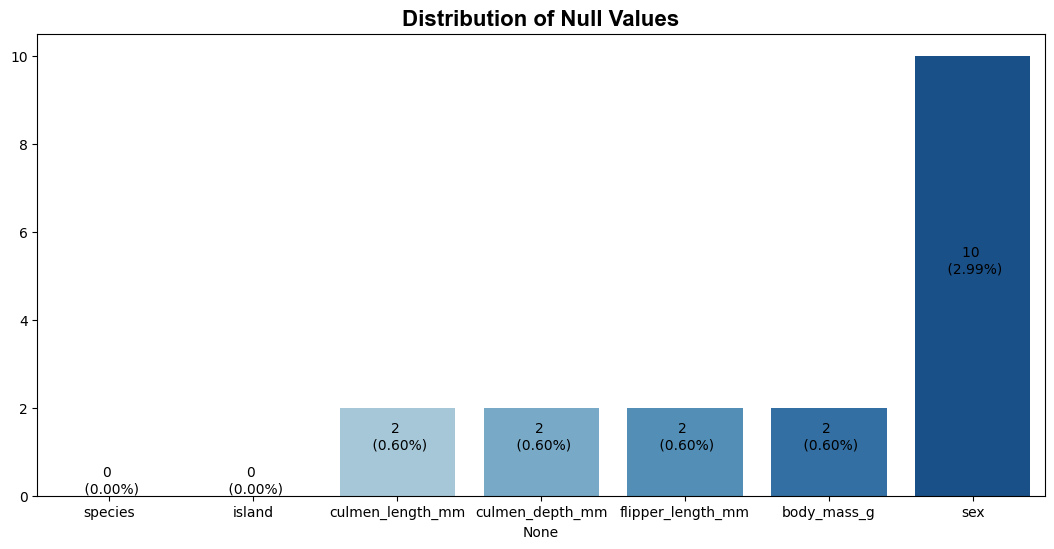

In [170]:
plt.figure(figsize=(13, 6))
plt.title('Distribution of Null Values', fontdict={'size':16, 'weight':'bold', 'family':'Arial'})

ax = sns.barplot(x=f.index, y=f.values, palette='Blues')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f} \n ({((p.get_height()) / rows)*100:.2f}%)',
        (p.get_x() + p.get_width() / 2, p.get_height()*0.5),
        ha='center', va='bottom'
    )

In [76]:
df.duplicated().sum()

0

Null values are less than 3% and there are no duplicate values, thus we can drop those 10 null valued rows.

In [77]:
df.dropna(inplace=True, axis=0)

In [78]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Numerical

## Categorical

In [79]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [86]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [94]:
df.drop(df[df['sex']=='.'].index, axis=0, inplace=True)

Dropped a column where sex was not mentioned.

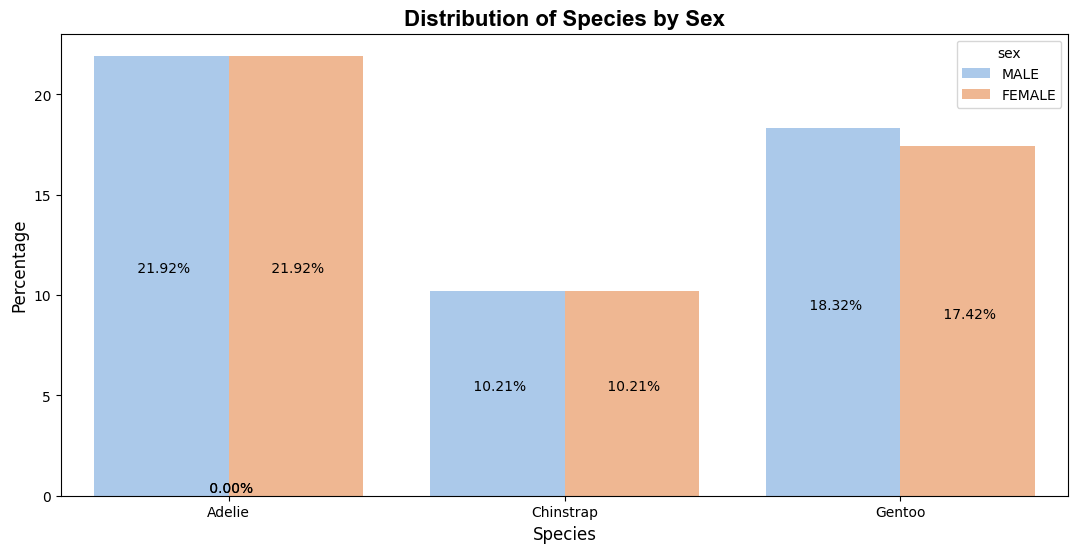

In [159]:
plt.figure(figsize=(13, 6))
plt.title('Distribution of Species by Sex', fontdict={'size':16, 'weight':'bold', 'family':'Arial'})

ax = sns.countplot(df,x='species',hue='sex', stat='percent',palette='pastel')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height() : .2f}%',
        (p.get_x() + p.get_width() / 2, p.get_height() * 0.5),
        ha = 'center', va = 'bottom'
    )

ax.set_xlabel('Species',fontdict={'size':12})
ax.set_ylabel('Percentage',fontdict={'size':12})

plt.show()

All species are equally distributed except Gentoo.

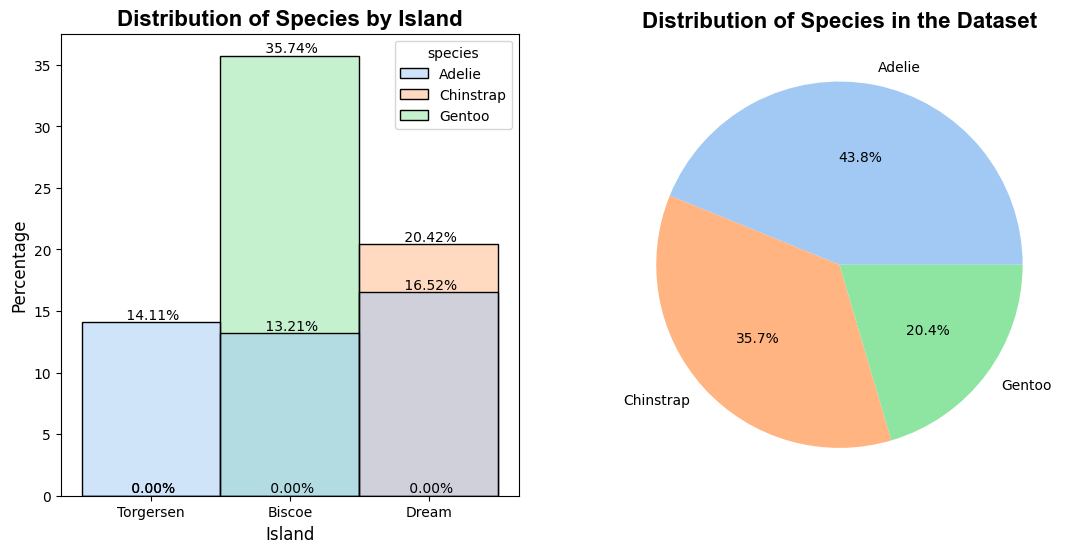

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,6))

ax1.set_title('Distribution of Species by Island',loc='center',fontdict={'family':'Arial', 'size':16, 'weight':'bold'})
sns.histplot(df, x='island', hue='species', ax=ax1, stat='percent',palette='pastel')

for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height() : .2f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha = 'center', va = 'bottom'
    )

ax1.set_xlabel('Island', fontdict={'size':12})
ax1.set_ylabel('Percentage', fontdict={'size':12})

colors = sns.color_palette('pastel',n_colors=3)
ax2.set_title('Distribution of Species in the Dataset',loc='center',fontdict={'family':'Arial', 'size':16, 'weight':'bold'})
ax2.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%',colors=colors)

plt.show()


In [188]:
avg_body_mass = df.groupby(['species','sex'])['body_mass_g'].mean()

In [189]:
avg_body_mass

species    sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: body_mass_g, dtype: float64

In [195]:
avg_body_mass_df = avg_body_mass.reset_index()
avg_body_mass_df

,species,sex,body_mass_g
0,Adelie,FEMALE,3368.835616
1,Adelie,MALE,4043.493151
2,Chinstrap,FEMALE,3527.205882
3,Chinstrap,MALE,3938.970588
4,Gentoo,FEMALE,4679.741379
5,Gentoo,MALE,5484.836066


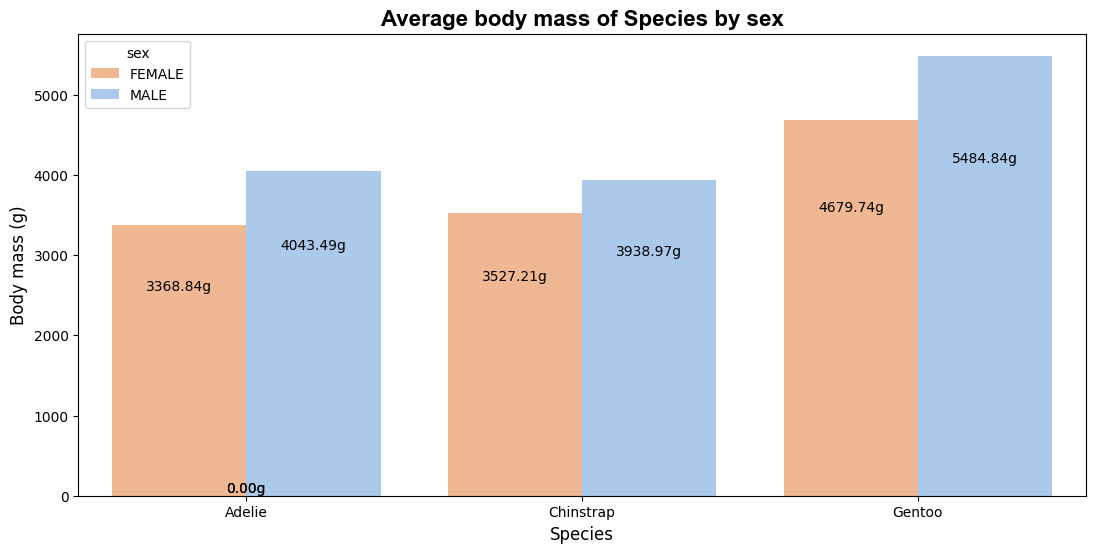

In [206]:
plt.figure(figsize=(13, 6))
plt.title('Average body mass of Species by sex', fontdict={'size':16, 'weight':'bold', 'family':'Arial'})

color_palette = sns.color_palette('pastel',n_colors=2)
colors = {'MALE' : color_palette[0], 'FEMALE': color_palette[1]}
ax = sns.barplot(x='species', y='body_mass_g', hue='sex', data=avg_body_mass_df, palette=colors)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}g',
        (p.get_x() + p.get_width() / 2, p.get_height() * 0.75),
        ha='center', va='bottom'
    )

ax.set_xlabel('Species', fontdict={'size':12})
ax.set_ylabel('Body mass (g)', fontdict={'size':12})

plt.show()

Gentoo species, especially males have the highest body mass among all. Adelie females have the lowest body mass among all.

In [173]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')